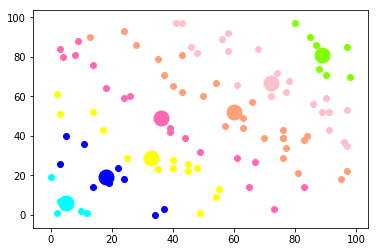

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# dist
#def distance(e1, e2):
#    return np.sqrt((e1[0]-e2[0])**2+(e1[1]-e2[1])**2)
#manhattan distance
def distance(e1,e2):
    return abs((e1[0]-e2[0])+(e1[1]-e2[1]))

# The clustering center
def means(arr):
    return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr])])

# The element farthest from A in arr that initializes the cluster center
def farthest(k_arr, arr):
    f = [0, 0]
    max_d = 0
    for e in arr:
        d = 0
        for i in range(k_arr.__len__()):
            d = d + np.sqrt(distance(k_arr[i], e))
        if d > max_d:
            max_d = d
            f = e
    return f

# The element closest to a in arr, used for clustering
def closest(a, arr):
    c = arr[1]
    min_d = distance(a, arr[1])
    arr = arr[1:]
    for e in arr:
        d = distance(a, e)
        if d < min_d:
            min_d = d
            c = e
    return c


if __name__=="__main__":
    ##to generate two dimensional random coordinates, and for those of you who have datasets, it's easy to understand arR and change it
    ## arr is an array, and each element is a binary array, representing a coordinate
    ## arr for example：[ (x1, y1), (x2, y2), (x3, y3) ... ]
    arr = np.random.randint(100, size=(100, 1, 2))[:, 0, :]

    ## Initializes the cluster center and cluster container
    m = 7
    r = np.random.randint(arr.__len__() - 1)
    k_arr = np.array([arr[r]])
    cla_arr = [[]]
    for i in range(m-1):
        k = farthest(k_arr, arr)
        k_arr = np.concatenate([k_arr, np.array([k])])
        cla_arr.append([])

    ## Iterative clustering
    n = 20
    cla_temp = cla_arr
    for i in range(n):    # Iterative n times
        for e in arr:    # Gather every element of the set to the nearest class
            ki = 0        # Let's say it's closest to the first center
            min_d = distance(e, k_arr[ki])
            for j in range(1, k_arr.__len__()):
                if distance(e, k_arr[j]) < min_d:    # Find a closer cluster center
                    min_d = distance(e, k_arr[j])
                    ki = j
            cla_temp[ki].append(e)
        # Update the cluster center iteratively
        for k in range(k_arr.__len__()):
            if n - 1 == i:
                break
            k_arr[k] = means(cla_temp[k])
            cla_temp[k] = []

    ## Visual presentation
    col = ['HotPink', 'Aqua', 'Chartreuse', 'yellow', 'LightSalmon', 'blue','pink','red']
    for i in range(m):
        plt.scatter(k_arr[i][0], k_arr[i][1], linewidth=10, color=col[i])
        plt.scatter([e[0] for e in cla_temp[i]], [e[1] for e in cla_temp[i]], color=col[i])
    plt.show()
